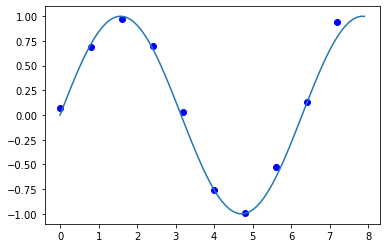

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_ten_data_points_1A():
    x = np.arange(0,8,0.8)
    y = np.sin(x)+np.random.normal(0,0.1,10)
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    plt.plot(x,y,'bo')
    plt.plot(np.arange(0,8,0.1),np.sin(np.arange(0,8,0.1)))
    plt.show()
    return x,y

x,y = generate_ten_data_points_1A()

In [31]:
def produce_weights(x, y, m):
    n = len(x)
    mat = np.zeros((m+1, m+1))
    for i in range(m+1):
        for j in range(m+1):
            mat[i,j] = (x**(i+j)).sum()
    y_target = np.array([((x**i) * y).sum() for i in range(m+1)])
    return np.dot(np.linalg.inv(mat), y_target) 


0


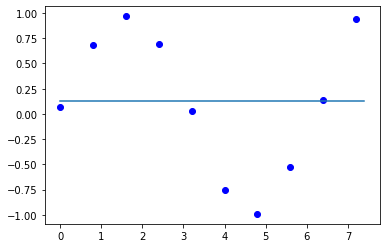

1


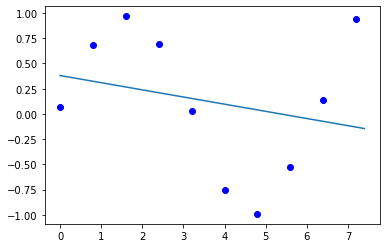

3


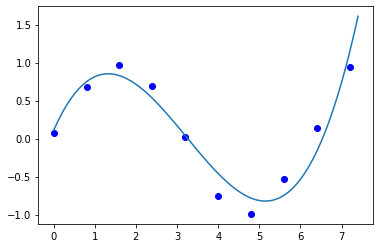

9


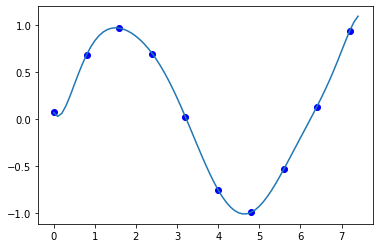

In [39]:
def fitted_curves_for_different_m_values_1b(x, y):
    for m in [0,1,3,9]:
        print(m)
        w = produce_weights(x,y,m)
        X = np.arange(0,7.5,0.1).reshape(-1,1)**np.arange(m+1)
        y_hat = np.dot(X,w.T)
        plt.plot(x, y, 'bo')
        plt.plot(np.arange(0,7.5,0.1), y_hat)
        plt.show()

fitted_curves_for_different_m_values_1b(x, y)

1e-08


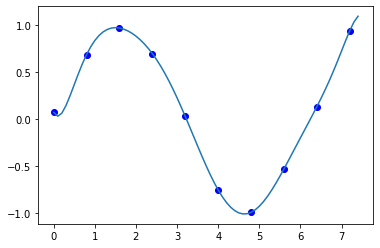

1e-06


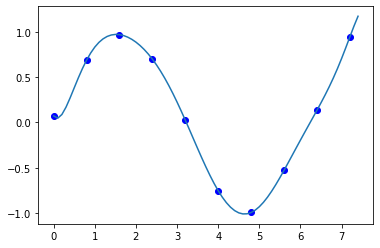

0.0001


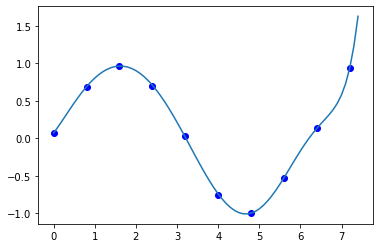

0.01


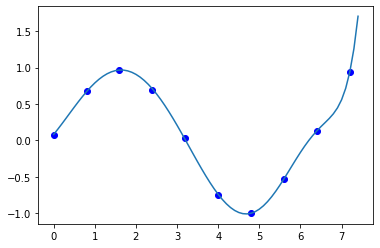

1


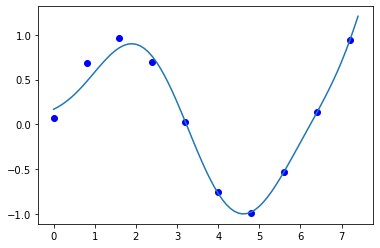

0


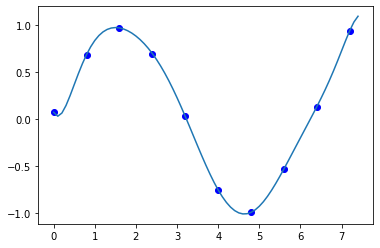

In [43]:
def plot_lamda_increasing_for_fixed_m_9_1c(x, y):
    m = 9
    lambdas = [10**(-i) for i in range(0,10,2)]
    lambdas = lambdas[::-1]
    lambdas.append(0)
    for i in lambdas:
        print(i)
        X = x ** np.arange(m+1)
        s = np.dot(X.T, X) + i * np.eye(m+1)
        y_h = np.dot(np.squeeze(y), X)
        coef = np.linalg.solve(s, y_h)
        coef = coef[::-1]
        trans = np.poly1d(coef)
        plt.plot(x, y, 'bo')
        plt.plot(np.arange(0,7.5,0.1), trans(np.arange(0,7.5,0.1)))
        plt.show()

plot_lamda_increasing_for_fixed_m_9_1c(x, y)